In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def F_mot(norm, theta, phi) : 
    F = np.zeros(3)
    F[0] = norm*np.sin(theta)*np.cos(phi)
    F[1] = norm * np.sin(theta)*np.sin(phi)
    F[2] = norm * np.cos(theta)

    return F



def translation(Motors, law):
    Motors_cart = np.zeros((8,3))
    for i, motor in enumerate(Motors[:, :3]) :
        Motors_cart[i, :] = F_mot(motor[0], motor[1], motor[2])
    
    return np.dot(law, Motors_cart)


def rotation(Motors, mass_center, geom_center, law) :
    Motors_cart = np.zeros((8,3))
    Motors_pos = Motors[:, 3:]
    Motors_dyn = Motors[:, :3]
    
    for i, motor in enumerate(Motors_dyn) :
        Motors_cart[i, :] = F_mot(motor[0], motor[1], motor[2])
    
    
    geom = geom_center - mass_center

    # torque = np.cross(geom, Motors_cart, 1, 1)

    torque_G = np.zeros((8,3))
    torque_O = np.zeros((8,3))
    for i, motor in enumerate(Motors):
        torque_G[i, :] = np.cross(Motors_pos[i, :] - geom_center, Motors_cart[i, :])
        torque_O[i, :] =  torque_G[i, :] + np.cross(geom, Motors_cart[i, :])
    return np.dot(law, torque_O)    

def printT(movement_arr):
    dict_ = {}
    for i in range(movement_arr.shape[0]):
        dict_[f"Law {i}"] = movement_arr[i, :]
    df = pd.DataFrame.from_dict(dict_, orient='index', columns=["Tx", "Ty", "Tz"])
    df = df.round(2)
    print(df)
 
def printR(movement_arr):
    dict_ = {}
    for i in range(movement_arr.shape[0]):
        dict_[f"Law {i}"] = movement_arr[i, :]
    df = pd.DataFrame.from_dict(dict_, orient='index', columns=["Rx", "Ry", "Rz"])
    df = df.round(2,)
    print(df)   

def printM(Motors, mass_center, geom_center, laws):
    print("For these laws the translations would be :")
    printT(translation(Motors, laws))
    print("\n")
    print("and the rotations :")
    printR(rotation(Motors, mass_center, geom_center, laws))
pi = np.pi

In [4]:
# Coordinate [x, y, z]
geom_center = [0, 0, 0] # Origin of the referential
mass_center = [0, 0, 0.5] # Mass center of the robot
mass_center = np.array(mass_center)
geom_center = np.array(geom_center)
L, l, h = 2.0,2.5,1.75

# Motor [power, theta, phi, x, y, z]
# theta is the polar angle and phi is the azimuthal one.
Motor_1 = [1, 3*pi/4, -pi/4, L, l, h]
Motor_2 = [1, pi/4, -pi/4, L, l, -h]
Motor_3 = [1, 3*pi/4, -3*pi/4, -L, l, h]
Motor_4 = [1, pi/4, -3*pi/4, -L, l, -h]
Motor_5 = [1, 3*pi/4, 3*pi/4, -L, -l, h]
Motor_6 = [1, pi/4, 3*pi/4, -L, -l, -h]
Motor_7 = [1, 3*pi/4, pi/4, L, -l, h]
Motor_8 = [1, pi/4, pi/4, L, -l, -h]

Motors = np.array([Motor_1,Motor_2, Motor_3, Motor_4, Motor_5, Motor_6, Motor_7, Motor_8]) 

print(Motors)

[[ 1.          2.35619449 -0.78539816  2.          2.5         1.75      ]
 [ 1.          0.78539816 -0.78539816  2.          2.5        -1.75      ]
 [ 1.          2.35619449 -2.35619449 -2.          2.5         1.75      ]
 [ 1.          0.78539816 -2.35619449 -2.          2.5        -1.75      ]
 [ 1.          2.35619449  2.35619449 -2.         -2.5         1.75      ]
 [ 1.          0.78539816  2.35619449 -2.         -2.5        -1.75      ]
 [ 1.          2.35619449  0.78539816  2.         -2.5         1.75      ]
 [ 1.          0.78539816  0.78539816  2.         -2.5        -1.75      ]]


In [ ]:
# law = [% of motor 1 activation, % of motor 2 activation, ....] len has to be the same has Motors
lois_translation = np.array([
    [ 1,  1, -1, -1, -1, -1,  1,  1], #Tx
    [ 1,  1,  1,  1, -1, -1, -1, -1], #Ty
    [-1,  1, -1,  1, -1,  1, -1,  1] #Tz
]) 

printM(Motors, mass_center, geom_center, lois_translation)

For these laws the translations would be :
        Tx   Ty    Tz
Law 0  4.0  0.0  0.00
Law 1  0.0 -4.0  0.00
Law 2  0.0  0.0  5.66


and the rotations :
        Rx   Ry   Rz
Law 0  0.0 -2.0  0.0
Law 1 -2.0  0.0 -0.0
Law 2  0.0 -0.0  0.0


Legend :
Motors :
Green : Positif (in the same sense as the vector)
Orange : Negatif (in the opposite sense as the vector)
Red : Null
Black vector : Translation resultant


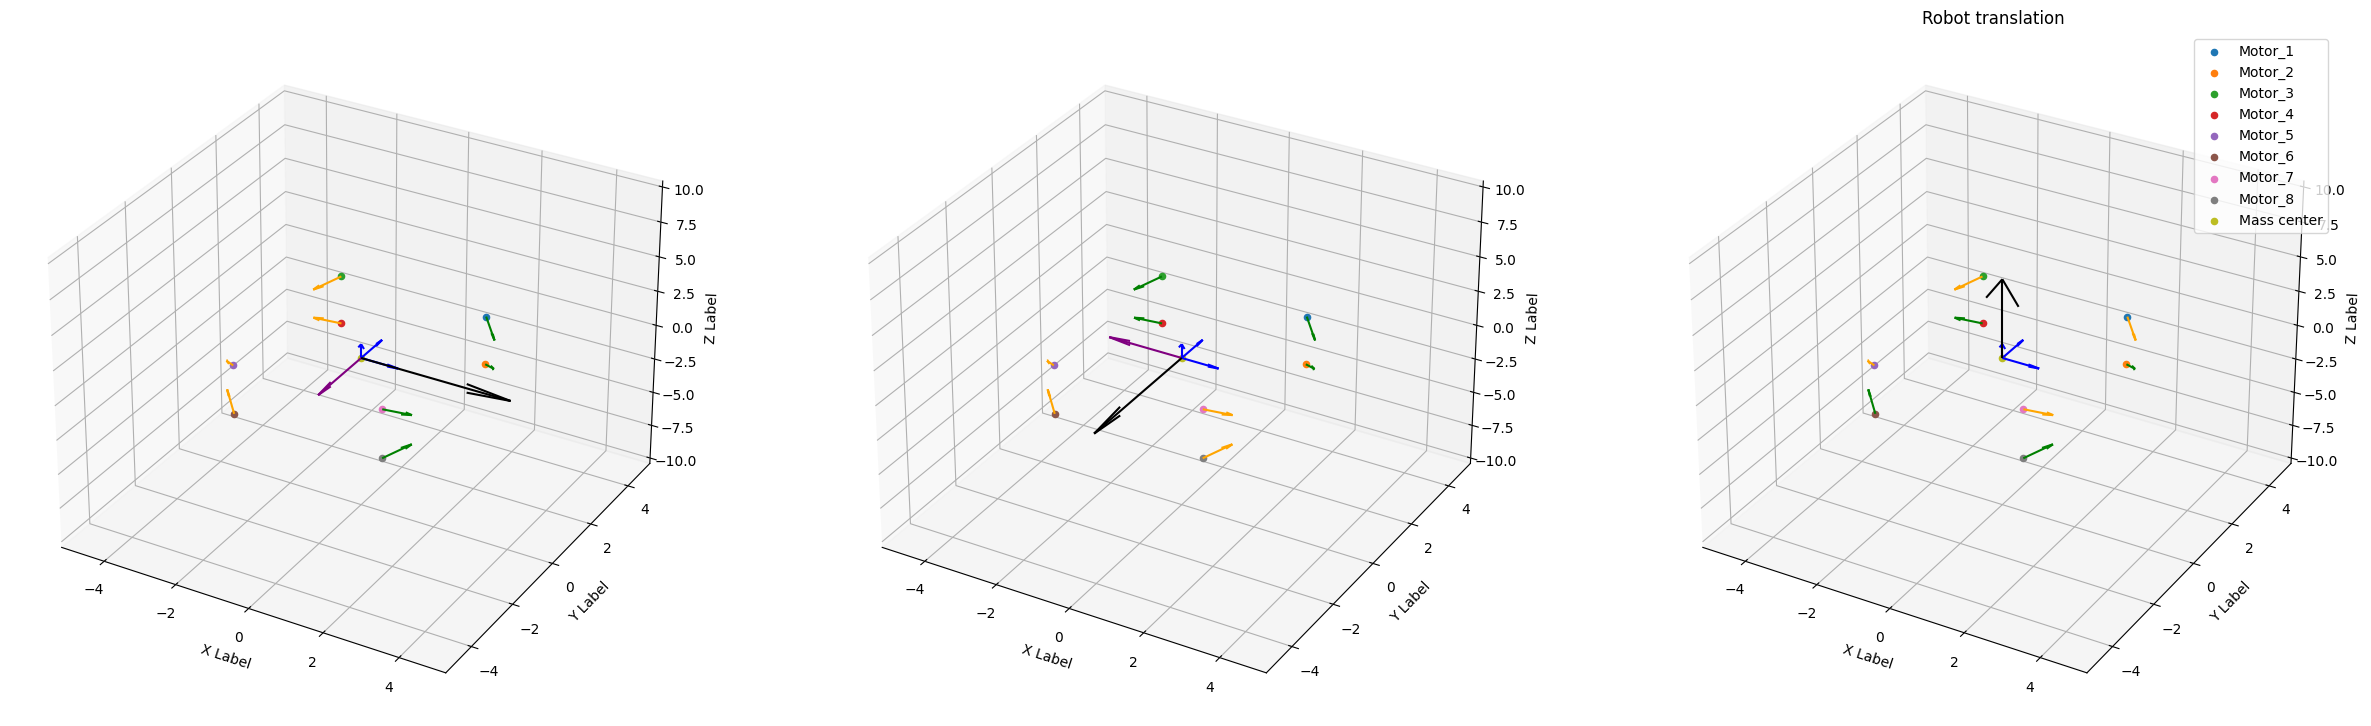

Saved in robot_trans.pdf


In [ ]:
print("Legend :")
print("Motors :")
print("Green : Positif (in the same sense as the vector)")
print("Orange : Negatif (in the opposite sense as the vector)")
print("Red : Null")
print()
print("Black vector : Translation resultant")
print("Purple vector : Rotation resultant")

fig = plt.figure(figsize = (30, 30))
reslt = translation(Motors, lois_translation)
resltR = rotation(Motors, mass_center, geom_center, lois_translation)
for k in range(len(lois_translation)):
    ax = fig.add_subplot(1,len(lois_translation),k+1,projection = '3d')
    ax.set_aspect('auto')
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.set_zlim(-10, 10)

    for i, motor in enumerate(Motors):
        
        if lois_translation[k][i] == 1:
            color = 'green'
        elif lois_translation[k][i] == -1:
            color = 'orange'
        else:
            color = 'red'

        ax.scatter(motor[3], motor[4], motor[5], label = f'Motor_{i+1}')
        x,y,z = F_mot(motor[0], motor[1], motor[2])
        ax.quiver(motor[3], motor[4], motor[5], x, y, z, color = color)

#    for i in range(4):
#        ax.plot([Motors[i][3], Motors[i+4][3]], [Motors[i][4], Motors[i+4][4]], [Motors[i][5], Motors[i+4][5]], color = 'black')
#
#    for i in range(4):
#        ax.plot([Motors[i][3], Motors[(i+1)%4][3]], [Motors[i][4], Motors[(i+1)%4][4]], [Motors[i][5], Motors[(i+1)%4][5]], color = 'black')
#
#    for i in range(4):
#        ax.plot([Motors[i+4][3], Motors[(i+1)%4+4][3]], [Motors[i+4][4], Motors[(i+1)%4+4][4]], [Motors[i+4][5], Motors[(i+1)%4+4][5]], color = 'black')       



    ax.scatter(mass_center[0], mass_center[1], mass_center[2], label = "Mass center")
    ax.quiver(mass_center[0], mass_center[1], mass_center[2], 0, 0, 1, color = 'blue')
    ax.quiver(mass_center[0], mass_center[1], mass_center[2], 0, 1, 0, color = 'blue')
    ax.quiver(mass_center[0], mass_center[1], mass_center[2], 1, 0, 0, color = 'blue')


    T = reslt[k, :]
    R = resltR[k, :]
    ax.quiver(mass_center[0], mass_center[1], mass_center[2], T[0], T[1], T[2], color='black')
    ax.quiver(mass_center[0], mass_center[1], mass_center[2], R[0], R[1], R[2], color='purple')



    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
plt.legend()
plt.title("Robot translation")
plt.savefig("robot_trans.pdf")
plt.show()
print("Saved in robot_trans.pdf")

In [79]:
lois_rotation = np.array([
    [-1,  0, -1,  0,  0, -1,  0, -1],
    [ 0,  1,  1,  0,  1,  0,  0,  1],
    [ 1,  1,  0,  0,  1,  1,  0,  0]
    ])


printM(Motors, mass_center, geom_center, lois_rotation)

For these laws the translations would be :
        Tx   Ty   Tz
Law 0 -0.0  0.0 -0.0
Law 1  0.0  0.0  0.0
Law 2  0.0  0.0  0.0


and the rotations :
         Rx    Ry   Rz
Law 0  3.57  0.00  0.0
Law 1  0.00 -9.16  0.0
Law 2  0.00 -0.00 -9.0


Legend :
Motors :
Green : Positif (in the same sense as the vector)
Orange : Negatif (in the opposite sense as the vector)
Red : Null

Black vector : Translation resultant
Purple vector : Rotation resultant


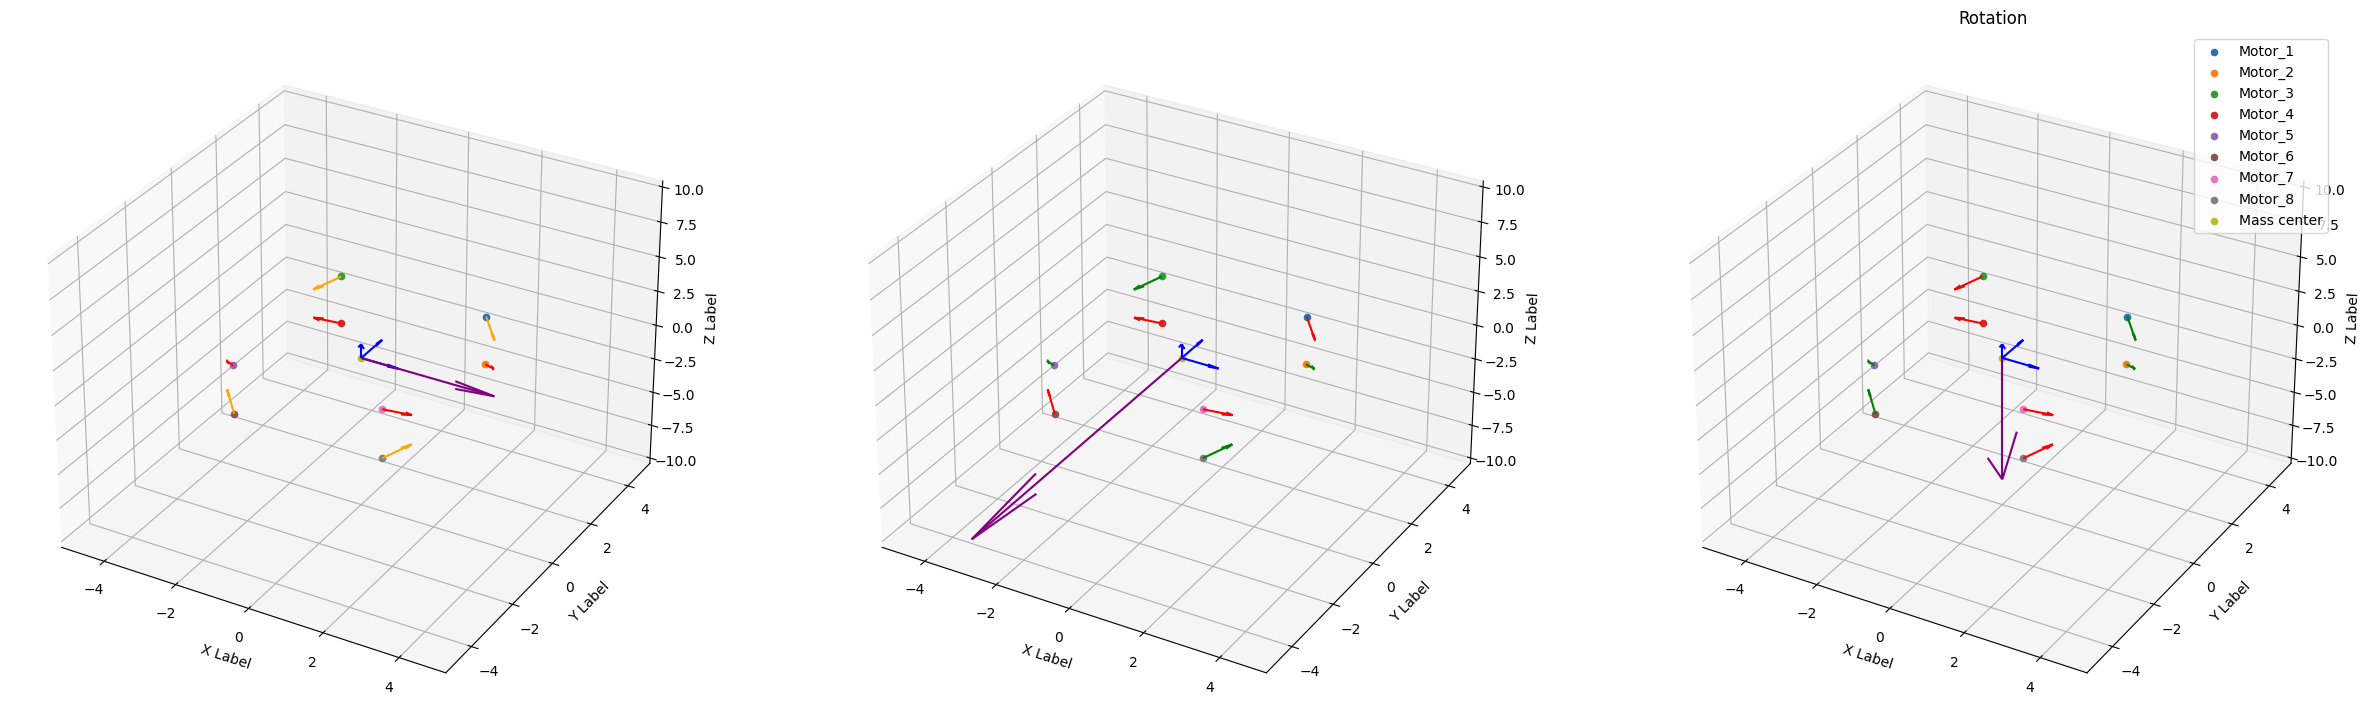

Saved in robot_rot.pdf


In [82]:
print("Legend :")
print("Motors :")
print("Green : Positif (in the same sense as the vector)")
print("Orange : Negatif (in the opposite sense as the vector)")
print("Red : Null")
print()
print("Black vector : Translation resultant")
print("Purple vector : Rotation resultant")

fig = plt.figure(figsize = (30, 30))
reslt = translation(Motors, lois_rotation)
resltR = rotation(Motors, mass_center, geom_center, lois_rotation)
for k in range(len(lois_rotation)):
    ax = fig.add_subplot(1,len(lois_rotation),k+1,projection = '3d')
    ax.set_aspect('auto')
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.set_zlim(-10, 10)

    for i, motor in enumerate(Motors):
        if lois_rotation[k][i] == 1:
            color = 'green'
        elif lois_rotation[k][i] == -1:

            color = 'orange'
        else:
            color = 'red'

        ax.scatter(motor[3], motor[4], motor[5], label = f'Motor_{i+1}')
        x,y,z = F_mot(motor[0], motor[1], motor[2])
        ax.quiver(motor[3], motor[4], motor[5], x, y, z, color = color)

    ax.scatter(mass_center[0], mass_center[1], mass_center[2], label = "Mass center")
    ax.quiver(mass_center[0], mass_center[1], mass_center[2], 0, 0, 1, color = 'blue')
    ax.quiver(mass_center[0], mass_center[1], mass_center[2], 0, 1, 0, color = 'blue')
    ax.quiver(mass_center[0], mass_center[1], mass_center[2], 1, 0, 0, color = 'blue')


    T = reslt[k, :]
    R = resltR[k, :]
    ax.quiver(mass_center[0], mass_center[1], mass_center[2], T[0], T[1], T[2], color='black')
    ax.quiver(mass_center[0], mass_center[1], mass_center[2], R[0], R[1], R[2], color='purple')


    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
plt.legend()
plt.title("Rotation")
plt.savefig("robot_rot.pdf")
plt.show()
print("Saved in robot_rot.pdf")